# King County Housing Analysis

By Tosca Le and Jonny Hofmeister

## Overview

This project explores different components of location and details of homes in King County, which is located in Washington state of the U.S. King County encompasses the area of greater Seattle. The data has been provided by Flatiron School and the project requires us to use linear regression models to generate data driven insights. 

This analysis notebook (located in branch: main), is a combined analysis and summary of the work done individually by group partners, Tosca Le and Jonny Hofmeister. Features and insights from the separate models are combined here to summarize our results and findings for the stakeholder presentation. Analyses for the separate location and details models can be found in the branches Jonny and Tosca, respectively. 

![seattle neighborhood](images/GI_157380908_SeattleNeighborhoods.jpg)

# Business Understanding

The stakeholder we have selected for the context of this project is a real estate agency in Seattle, King County Realtors. The real estate agency should be able to assist homeowners who are looking to buy and sell homes in King County. By understanding the house sales data, the real estate agency can give useful advice to homeowners on how location and characteristics of the home might increase or decrease the estimated value of their homes.

The scope of this regression analysis is determined by the data and features we have access to. Finding out how home price is dependent on features given in the data, like square footage, floors, number of bed/baths, zipcode, etc, is within the scope of the data. The scope of this analysis does not include predicting price or finding its dependency on feature values outside the range of the data we are using to train the model. For example, this analysis can find the dependency and generally predict price for the zipcodes given in the King County data, but not for zipcodes outside of it; and can find the trend for how the number of bedrooms effect price as long as this value is not way outside the range of the data. It is important the stakeholders/realtors understand this scope, so they can properly apply this analysis to future homes/data. 

# Data Understanding

In [1]:
# the usual imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Begin by importing the data with pandas and examining the columns and data types.

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### *Target and Predictors*

The target variable in the data for this regression is price.

We have 19 other columns left at our disposal to use as predictors. Some like 'sqft_living' are probably very useful, while others like 'id' and 'date' are practically useless to us.

We have decided to split the columns into separate models in order to add context for the models we report to the realtors. We have decided to create two models, one generated from location based features of a home, such as zipcode and neighbor lot size, and a second model generated from home-specific features, like the number of bedrooms and condition of the home. 

Both these analyses will explore the dependency of price on features, but will provide two different contexts in which realtors can examine how location and home separately influence the price of homes. 

### *Addressing Model Assumptions*

If we are to use these variables as predictors, we must first validate some of the assumptions that go into linear regression. The two main assumptions are normally distributed predictors, and multicolinearity. 

**Home Model:**
For the home model, some features were selected that are continuous, and some that are categorical. Home square footage and year built are continuous while the others like grade and condition, may be numbers, but must be treated like categorical data as their values are limited to integers on a set range. Some columns such as bathrooms can be treated as numeric or categorical features.

It was found that the target column, price, along with the continuous columns, are not normally distributed. To address this, these were log transformed and a standard scalar was applied. As seen below, the year column after log transformation increased normality. Examples of other features can be seen below in the Location Model section.


<img src="images/yr_built_log.png" alt="Drawing" style="width: 200px;"/>


In addressing multicolinearity of variables for the home model, it was found that home square footage has high correlation to the number of bathrooms and grade. Iterations of the initial model addressed multicolinearity by dropping these columns and then transforming bathrooms to a bed-to-bath ratio column. 

**Location Model:**
For the location model, of the columns selected, there were both continuous and categorical features. Zipcode and waterfront are categorical and can be dealt with by one-hot encoding the zipcodes into boolean columns. 

The continuous columns are lot square footage, neighbor lot square footage, price, and home square footage. Note that home square footage is also contained in the location model, this is because it was determined that home size accounts for so much of the price that a viable model could not be produced without it. 

In examining these features for multicolinearity, it was found that lot sqft, and neighboring lot sqft were very highly correlated. To deal with this, they have been transformed into a single column, the ratio of the size of the lot of interest to the average lot size of the nearest 15 neighbors. This new variable describes if a lot is bigger or smaller than the neighbors on average.

Looking at the distributions of these continuous variables, it was found that none represented normal distributions. Below the distributions for price and sqft_living are show as examples:

![pre-log feats](images/prelogfeats.png)

It was determined that log transforming price, sqft_lot, and the new lot_ratio column both increased the normality of the predictors and the confidence of the model results. Here are the same features after log transforming:
![post-log feats](images/postlogfeats.png)

We can visually confirm that logging our target and features greatly improves their normality and thus the performance of the model.

**Scaling:**

In order to compare the effects of each of these predictors, a standard scalar was applied after log scaling to each of the three continuous columns. It is unnecessary to scale the OHE categorical columns.

### To summarize predictors:

**Home Model Predictors:** 
- Log of home square footage
- Log of year built
- Number of bedrooms
- Number of bathrooms
- Number of floors
- Overall condition 
- Overall grade

**Location Model Predictors:**
- Zipcode
- Waterfront
- Log of home square footage
- Log of lot size ratio

***Log Target***

It is important to note that each of the models precits for the log of price, as it increased the fit of prediction in both cases. In order to examine residuals and error in a dollar context, predictions must be un-log-transformed.

# Data Preparation

Data preparation here entails cleaning for missing and unwanted values, selecting columns from interest from the data, one-hot encoding, logging and scaling, and finally train/test splitting. 

**Basic Cleaning:**

We decided to clean our data in the same way, so that even though we are using different features of the home, each model contains the same houses.

What was cleaned:
- Removed all duplicates from the data (177 rows).
- Drop 33 bedroom outliers house.
- Remove rows with NaN values in the waterfront column (2353 rows).



In [4]:
df.drop_duplicates(subset='id', inplace=True)
df.dropna(subset=['waterfront'], inplace=True)
df = df[df['bedrooms'] < 33]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19066 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19066 non-null  int64  
 1   date           19066 non-null  object 
 2   price          19066 non-null  float64
 3   bedrooms       19066 non-null  int64  
 4   bathrooms      19066 non-null  float64
 5   sqft_living    19066 non-null  int64  
 6   sqft_lot       19066 non-null  int64  
 7   floors         19066 non-null  float64
 8   waterfront     19066 non-null  float64
 9   view           19009 non-null  float64
 10  condition      19066 non-null  int64  
 11  grade          19066 non-null  int64  
 12  sqft_above     19066 non-null  int64  
 13  sqft_basement  19066 non-null  object 
 14  yr_built       19066 non-null  int64  
 15  yr_renovated   15690 non-null  float64
 16  zipcode        19066 non-null  int64  
 17  lat            19066 non-null  float64
 18  long  

### Column Prep

Next, the columns for each model were selected modified or OHE as needed, then log transformed and scaled. Specific information and code for how this was done is not given in this group analysis summary, but can be found in each of the indiviudal model notebooks. 

**Location Model Columns:**

Two successful location models were created. The first one-hot encoded the zipcodes given. The second grouped zipcodes into the different suburbs of Seattle, and then one-hot encoded these new categories. The goal of trying both these models is to give slightly different context to the realtors/stakeholders and home owners/buyers. Hearing a zipcode and instinctively knowing specifially what area that contains is not something most of us can do, zipcodes are weird, often unintuitive shapes, even if you know the area. Grouping homes by city/suburb instead gives realtors the ability to call the area of Seattle a buyer is interested in by name, giving a more general description of how that location influences price rather than zipcode.

Examples of the Seattle suburbs used are: Auburn, Ballard, Bellevue, Black Diamond, Bothell, Broadview, Burien . . . Redmond, Renton, Sammamish, Snoqualmie, Tukwila, Queen Anne, University, Vashon, West Seattle, Woodinville.

While a suburb name may be more recognizeable than a zipcode, there still are benefits to producing a zipcode model. The main benefit is that GIS information on zipcode boundaries is readily available. This means that creating a map to outline zipcode areas will be an easy way to provide stakeholders and customers with a way to visually interact with and see how these areas influence price.


**Home Model Columns:**

For the most successful model, all the predictors of interest were used. Condition and grade were encoded with dummy variables, while the continuous columns were scaled using StandardScaler. The early iterations didn't use grade or had bathroom transformed to a bed-to-bath ratio, which described less variance in the data. However, using condition and grade features are slightly less concrete in defining a home since homeowners might not know what these ratings entail.

Condition is coded on a scale of 1-5, 1 being poor/worn out to 5 being very good. Grade has a wider scale, from 1 to 13. 1-3 generally defined as falling short of minimum building standards and 13 being generally a custom design and build.

*More details can be found [here](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)*

A rating number might not translate as well in comparison to number of bedrooms, but by utilizing these columns, they give a bigger picture to the overall aesthetics and likability of a home, which can be important selling factors and of course understand how it relates to price.

#### *Train Test Split*

The final important step of preparation before modeling is splitting the data into training and testing sets. Just as we opted to clean the data identically above, we opted to split the data identically as well. We decided on using 75% of the data for training, and 25% for testing. We also used the same random seed within the train test split function so that we would be training and testing on the same homes/rows. 

# Modeling

Now that the data has been prepped and properly split, we perform the linear regression. Regressions from both the packages Stats Models and SkLearn were used, so it is important to know results from each are identical. **Stats models** was used intially because it's summary feature conveniently shows all model results and coefficients. **Sklearn** was used after because it is a more interactive and well documented package that we can use to easily produce predictions for our testing set and evaluate error. 

### Baseline Model (FSM):

In creating linear models, it is important to have something to compare the performance of your model against. This is where creating a baseline model comes in, and can be done many ways. The most basic and naive baseline we can create is simply the average price; eg. for any values of home features, we always predict the average price across all homes. 

This baseline model is visualized below with a scatterplot of the log price and sqft_living.
![baseline avg](images/avg_baseline.png)

For every value of sqft_living (or any other column), the baseline model just predicts the average of the target (log price), shown here as the red line.

We can also use the same statistical tools to measure fit and error for this baseline in order to easily compare to our next models. For this naive average baseline, the R^2 value is -0.001, meaning this line doesnt seem to fit the data at all. The root mean square error (RMSE) for this baseline is 0.522. This RMSE is not in the units of dollars, but log(dollars,) and must be compared to the same error in future models.

### Location Modeling:

This summary anlysis will not show the entire iterative modeling process that the location model underwent. Different iterations included removing zipcodes or suburbs that contained no homes. Another iteration used lat/long to produce a distance from city center, but this model was unsuccessful and thrown out. 

**How were the fit of models validated and error addressed?**

The main metric we relied on to validate model fit is the Coefficient of Determination, commonly know as the R-squared value, which tell us the how much of the variance in our data the model could account for. The loss function used to evaluate predictive error in the model is Root Mean Square Error, which computed the average residual error across all predictions. 

The threshold of perfomance we are seeking for a well-fit model is an R-squared value above 0.8. This was chosen because it is the threshold commonly used in the industry; explaining over 80% of the variance in the data will be considered successful. 

**Zipcode Model Results:**

The zipcode model was able to explain the most variance in the data and do significantly better than the baseline; it produced a model with an R-squared of 0.835 on the training set, and 0.833 on the testing set. This means that we can use the features and coefficients given in the model to explain 80% of the variance in price. Next, looking at the the RMSE, it was best to un-log the results to give error in a dollar unit. The RMSE for the zipcode model was 147,000 dollars. Even though this model accounts for most the variance in the data, the average error for a single prediction is 147k. So this model is able to desribe the dependancy of price on the features (R^2 = 0.833), but has implications if we were to use this model to predict the price of single homes (RMSE = 147k dollars).


**Seattle Suburb Model Results:**

The city/suburb model performed slightly worse than the zipcode model. But it was still able to account for over 80% of the variance in the data; the R-squared for the training set was 0.804, so above the threshold, and quite well above the R^2 for the baseline model. 

#### Validating Residuals:

The last step to validate these models is to examine the distribution of their residuals. Normal residuals show us that the error for our model is spread evenly and the error is centered around zero. Non-normal residuals imply that we predicted more values either above or below their true value, and the model results are skewed. Residuals for both the Seattle Suburb model and Zipcode model were produced and shown in the graphs below:

![res](images/resid_loc.png)

The residuals are indeed normal and were verified a second time using 'qq' plots, shown in the separate notebook.

### Home Modeling:



Similar to location modeling, this summary will not show the entire iterative modeling process. 

**Initial Model/Refinement Results:**

The home models were not as successful as the location models when considering a threshold of performance for well-fit models at an R-squared value above 0.8.

By not utilizing bathroom or grade predictors, the model accounted for approximately 52-53% of the variance in the data, respectively. The model without grade produced an R-squared of 0.525 on the testing set. While, the model without bathroom had an R-squared of 0.512 on the testing set.

After un-logging the results of RMSE, the initial model had an RMSE of about 247,989 dollars, which is very high and has implications if this were to be used to predict prices for a single home.

**Bed-to-bath Ratio Model Results:**

Similarly, this model received an R-squared value of 0.5209, accounting for about 53% of the variance in the data. On the testing set, the model resulted in an R-squared of 0.517. By transforming the bathrooms column to a bed-bath-ratio, multicolinearity was decreased, but the model performed slightly worse.

**Final Model Results:**

For the last iteration, the original bathrooms column was used and grade was added as a predictor. This model had the highest R-squared value of 0.641 and 0.628 on the testing set. RMSE was still high (215,618) but much lower than the other iterations.

**Validating Results:**

By exploring the residuals for the final model, they appear fairly normally distributed. The residuals can be seen displayed below.  

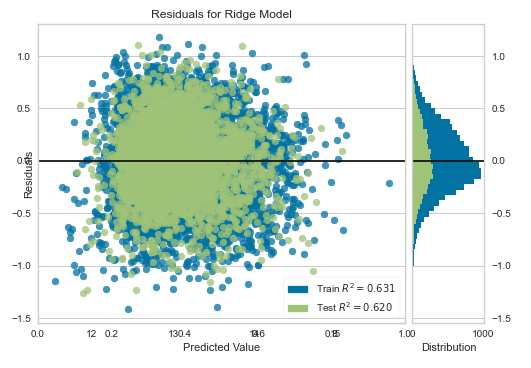

Now that both these models have been validated, we can move on to evaluating/analyzing them.

# Evaluation

### Location Model Evaluation:

**Seattle Suburbs and Home Price**

The main focus of this model was to try to extract information about how different area effect price. We can do that best by comparing the coefficients for different areas.

First, we identify that coefficients for Enumclaw and Maple Valley have high p-values, eg. there is a high chance these values are due to randomness. We therefore note these areas coefficients will not be considered or interpreted as results.

Second, an obvious distinction we can make using the coefficients is if they are positive or negative. Negative coefficients mean that being associated with that area might actually decrease the value of the home. This can be seen below in the bar chart for Coef value for each KC suburb.

![bar_coef_kc](images/kc_coef_barchart.png)

The areas that may negatively impact price are Auburn, Covington, Des Moines, Federal Way, Kent, and Tukwila.

The rest of the areas all positively impact price. Areas with the largest positive impact on price are of interest so let's identify those. Cities whose coefficient are greater than 0.7* are Ballard, Bellvue, Capital Hill, Madrona, Magnolia, Medina, Mercer Island, Queen Anne, and University district. These regions all correlate with my personal understanding of the 'fancy' areas of Seattle. Medina area has the highest influence on price, with a coefficient of 1.34.

*I chose to use 0.7 to compare these coefficients as it happens to be the coefficient for the other boolean column, Waterfront. This means that being a waterfront property in general has about the same effect as being in one of these nicer areas. Being waterfront would greatly influence the price of a home in an area with a low location coefficient; an area with a coef of 0.2 would have over 3 times more value created from being waterfront that from being in that area. But for the highest price area, Medina, waterfront only adds about 50% of the value that being in the Medina area does.


**Zipcodes and Home Price**

The best way to evaluate how different zipcodes of Seattle influence home price is to map them. Below is a graph in which each zipcode in the data has been outlined as a separate region, and then colored based on how high the regression coefficient is for that zipcode. Yellow zipcodes indicate a low dependency on price, eg. the fact a home is located here does not add much value (may even decrease it on average if coef < 0). Bluer areas indicate a relatively high regression coefficient, eg. a home being located there does add value to it.

*To view the interactive map, click this [map link](https://nbviewer.jupyter.org/github/jonnyhof/kings_county_housing_analysis/blob/jonny/data/zipcode_coef_map.html)*

<img src="images/map_thumbnail.png" alt="map_thumbnail" width="600"/>

Immediate observations we can make from the map is that being in a zipcode closer to downtown or north Seattle correlates with a higher dependency for price.


**Shared features: waterfront, sqft_living, and lot_ratio**

Waterfront, sqft_living, and lot_ratio are columns that were included in both zipcode and suburb models, and performed about the same in each. 

Size of the home accounts for a much greater portion of the price than having a yard larger than your neighbor. Going up one standard deviation in price increases price by a factor of 0.3233 while going up one STD in lot ratio increases price by a factor of 0.0146. Having a larger yard than your neighbor seems to matter a bit, but not nearly as much as home size itself does.

Waterfront has a significant impact on price in each of the models, its coefficient is 0.7-0.8. To add some context to this, a coef of 0.75 means that just being a waterfront house anywhere adds 50% of the value that would be added if the home was just located in the most expensive area, Medina (coef = 1.52). 

### Home Model Evaluation:

As mentioned in the location model, square footage of the home is a significant predictor. In the first model, going up one standard deviation increases price by a factor of 0.3597. Through each iteration, the coefficient fluctuates and in the last model, 0.1711. Home square footage accounted for a greater portion of price when compared to the number of bedrooms, bathrooms and floors. 

Year and number of bedrooms have negative coefficients of -0.1846 and -0.0421. This suggests that with going up one STD in year and one STD in bedrooms, the price decreases by the respective coefficient value.

All of the predictors mentioned so far in the home model, were significant with p-values at 0.000.

For condition and grade, these features were one-hot encoded since values could only be a set integer on each rating scale. For condition, only a score of 5 has a significant p-value (0.014). With a lower score, comes a higher p-value and decreasing coefficient. Similarly, a higher grade, specifically 9-13, appears to have the largest positive impact, even more than square home footage. Grade scores of 11-13 have a coef of over 1.1.

Through these modeling efforts, we were able to offer insight on how location and home features influence price. KC Realtors should be able to highlight these features and help potential clients who are looking to buy or sell homes in King County, Washington. In the following section, additional steps are outlined to how we can make our models even more successful.

# Moving Forward

#### Things to try/change within the Location model:

- Lot size ratio didn't account for much of the variance in price, I would try reverting back to using just lot size, and see if that reduces error. 
- Other location boundaries besides zipcode could be tested, like US census tract because it is available information and has been shown to be a good predictor of other things, and school district boundaries as it is something commonly searched for by people buying a family home and could provide useful information to realtors' customers.

### Things to try/change within the Home model:
- Bedrooms, bathrooms, and floors were treated as numeric/continuous variables. I would examine how these predictors affect the model by categorizing them or transforming them in a different rather than leaving them as is.
- Incorporating other predictors can be helpful in further understanding what influences home prices. Specifically, how the total square footage is dispersed between above ground and the basement, what year a home was renovated, and how total square footage might relate of its neighbors since these relate to ones that were used in the home model.

### Combining Successful Model Features to Reduce Error:

Our models gave good information about how location and home influence price, but is not accurate enough for a realtor or estimator to use to attempt to value a single home. Combining the successes of our models into a single one that includes all features of a home will hopefully produce better fit and reduce error as we have more features we know can successfully account for variation in the data. 

There are also more things we could try to reduce error to create a predictive model that could be used in practice by shareholders. We could see how a polynomial or exponential regression worked, and if it fit the data better or was able to reduce prediction error in parts of the data. Another way to reduce prediction error is to create different models for different tiers of price. By grouping price into subsets of the data, we may be able to create models that predict more accurately for certain types of homes. Realtors would then be able to narrow down their prediction if they were confident in their price classification of the home. 

These models probably aren't replacing appraisers any time soon, but could be used in conjunction with appraisals to identify outliers or incorrect appraisals. It has been shown that race of the home buyer can influence the price an appraiser rates a house at, prediction models trained on good data could be used to help reduce bias in appraisals and ensure homes are price fairly. 